In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [19]:
import os
import warnings

import pandas as pd

from testmining import folders

strategy = 'matrix-file-similarity'

path = folders.apfd(folders.project('square@okhttp'))
apfd = pd.read_csv(path)[['travisJobId', strategy]]
apfd.head()

,travisJobId,matrix-file-similarity
0,2685384,0.820144
1,2697352,0.701510
2,2820645,0.825784
3,2923196,0.826389
4,2923220,0.826389


In [22]:
import json
cache = os.path.join(folders.project('square@okhttp'), 'matrix-unit')

def collect():
    rows = []
    for job_id in apfd['travisJobId']:
        path = os.path.join(cache, '%s.json' % job_id)
        
        if not os.path.exists(path):
            warnings.warn('Cache file for job %s not found' % job_id, RuntimeWarning)
            continue
        
        with open(path) as fd:
           m = json.load(fd)['matrix']
        files = set()
        for index in range(0, len(m), 2):
            files.add(m[index]['fileName'])
        rows.append((job_id, len(files)))
    return pd.DataFrame(rows, columns=['travisJobId', 'fileCount'])

counts = collect()
counts.head()

,travisJobId,fileCount
0,2685384,7
1,2697352,4
2,2820645,1
3,2923196,2
4,2923220,2


In [13]:
df = pd.merge(left=apfd, right=counts, on='travisJobId', validate='1:1')
df.head()

,travisJobId,matrix-file-similarity,fileCount
0,2685384,0.820144,7
1,2697352,0.701510,4
2,2820645,0.825784,1
3,2923196,0.826389,2
4,2923220,0.826389,2


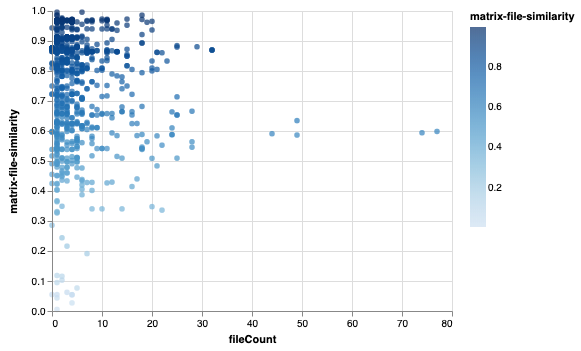

In [14]:
import altair as alt

alt.Chart(df).mark_point(filled=True).encode(x='fileCount',
                                             y=strategy,
                                             color=strategy)

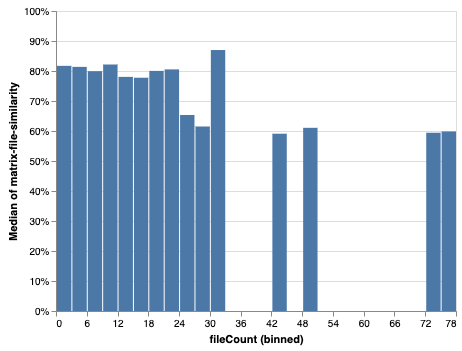

In [15]:
alt.Chart(df).mark_bar().encode(x=alt.X('fileCount', bin=alt.BinParams(step=3)),
                                y=alt.Y('median(%s)' % strategy, scale=alt.Scale(domain=[0, 1]), axis=alt.Axis(format='%')))